In [1]:
### Notebook assuming the folder Dataset is located in the same folder than the notebook

In [13]:
### Generate a dataframe for training from .csv file
import pandas as pd
import glob
import numpy as np


def generate_dataframe(filepath):
  dataframe = pd.read_csv(filepath)
  return dataframe

# load only 1 .csv file
#filepath = 'Dataset/Kelmarsh_training_data/Kel_df1_training.csv'
#dataframe_training = generate_dataframe(filepath)
#print(dataframe_training.shape)

# load all the .csv file in the folder that end with "*df1_training"
path1 = 'Dataset/Kelmarsh_training_data/*df1_training.csv'
#path2 = 'Dataset/Penmanshiel_training_data/*training.csv'
#files = glob.glob(path1) + glob.glob(path2)
files = glob.glob(path1) 

dataframe_training = pd.DataFrame()
for file in files:
    df = generate_dataframe(file)
    dataframe_training = pd.concat([dataframe_training, df], ignore_index=True)
print('Shape of the dataframe training is :',dataframe_training.shape)    
# check that the import is correct
# dataframe.to_csv('Dataframeascheck0.csv', index=False)

Shape of the dataframe training is : (46694, 14)


In [14]:
### Generate a dataframe for testing from .csv file
#load only 1 .csv file
#filepath = 'Dataset/Kelmarsh_test_data/Kel_df1_test.csv'
#dataframe_test = generate_dataframe(filepath)

# load all the .csv file in the folder that end with "*df1_test"
path1 = 'Dataset/Kelmarsh_test_data/*df1_test.csv'
#path2 = 'Dataset/Penmanshiel_test_data/*test.csv'
#files = glob.glob(path1) + glob.glob(path2)
files = glob.glob(path1)

dataframe_test = pd.DataFrame()
for file in files:
    df = generate_dataframe(file)
    dataframe_test = pd.concat([dataframe_test, df], ignore_index=True)
print('Shape of the dataframe test is :',dataframe_training.shape)    
# check that the import is correct
# dataframe.to_csv('Dataframeascheck0.csv', index=False)

# replace the occurence 'Day'/'nigh' by numeric value '1'/'0' 
dataframe_test = dataframe_test.replace({"Day": 1, "Night": 0})

#create a mapping to replace the occurence of the month in the dataframe:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
dataframe_test = dataframe_test.replace(month_mapping)

# Save the DataFrame to a CSV file for additionnal checks
dataframe_test.to_csv('Dataframeascheck_test.csv', index=False)


Shape of the dataframe test is : (46694, 14)


In [15]:
## Shape of testing and test dataframe should be the same
## Convert training data to the test data format

In [16]:
import pandas as pd

def print_dataframe_info(dataframe):
  # Print the number of rows and columns in the dataframe
  print('Rows:', dataframe.shape[0])
  print('Columns:', dataframe.shape[1])

  # Print the column names
  print('Column names:', dataframe.columns.tolist())

  # Print the data types of each column
  print('Column data types:')
  for col, dtype in dataframe.dtypes.iteritems():
    print('-', col, ':', dtype)

# Convert 'time' column to datetime object using the strftime format
dataframe_training['time'] = pd.to_datetime(dataframe_training['time'], format='%m/%d/%Y %H:%M')

# Create a new column 'month'
dataframe_training['month'] = dataframe_training['time'].dt.month_name()

# Create a new column 'day or night'
#Considering that the day is between 6am and 6pm 
dataframe_training['Day.Night'] = dataframe_training['time'].apply(lambda x: 'Day' if x.hour > 6 and x.hour < 18 else 'Night')

# replace the occurence 'Day'/'nigh' by numeric value '1'/'0' 
dataframe_training = dataframe_training.replace({"Day": 1, "Night": 0})

#create a mapping to replace the occurence of the month in the dataframe:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
dataframe_training = dataframe_training.replace(month_mapping)


# Save the DataFrame to a CSV file for additionnal checks
dataframe_training.to_csv('Dataframeascheck_training.csv', index=False)


In [17]:
### Correlation Matrix for additionnal verifications
### Create a heatmap using the seaborn library

In [18]:
import seaborn as sns

corr = dataframe_training.corr()
sns.heatmap(corr, cmap='RdYlBu')

C:\Users\agirard\AppData\Local\Temp\ipykernel_8432\2495370328.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe_training.corr()


<AxesSubplot: >

In [19]:
### First look at the scattered power curve for additionnal verifications

In [20]:

import matplotlib.pyplot as plt

def plot_dataframe(df, x_col, y_col):
  x = df[x_col]
  y = df[y_col]
  plt.scatter(x, y,s=0.9)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.show()
    
# Plot the "x" and "y" columns
plot_dataframe(dataframe_training, 'wind_speed', 'power')

In [21]:
## Benchmark using dswe package - https://github.com/TAMU-AML/DSWE-Package 
## make sure you install the dswe package if not ==> error ModuleNotFoundError: No module named 'dswe'

In [22]:
## for computation efficiency I take only 25% of the shuffled training dataset.
## !!! Remove the line below to train on the full dataset !!!!
#import numpy as np
#dataframe_training = dataframe_training.iloc[np.random.permutation(len(dataframe_training))]
#dataframe_training = dataframe_training.iloc[:int(len(dataframe_training) * 0.25), :]

In [23]:
## Spliting the dataset 
#!!!  Since no power (ground true) is provided on test set, the performance is compared to a test set from the training set !!!
#!! dataframe_test is now different than test_dataframe
from sklearn.model_selection import train_test_split

#Define the attributes that are characteristics of the input/output
#column_list_input = ['wind_speed', 'wind_speed_sensor1', 'wind_speed_sensor1_SD', 'wind_speed_sensor2', 'wind_speed_sensor2_SD', 'density_adjusted_wind_speed', 'wind_direction', 'nacelle_position', 'wind_direction_SD', 'nacelle_position_SD', 'nacelle_ambient_temperature', 'TI', 'month', 'Day/Night']
#column_list_input = ['wind_speed', 'wind_speed_sensor1', 'wind_speed_sensor1_SD', 'wind_speed_sensor2', 'wind_speed_sensor2_SD', 'density_adjusted_wind_speed', 'wind_direction', 'nacelle_position', 'wind_direction_SD', 'nacelle_position_SD', 'nacelle_ambient_temperature', 'TI', 'month', 'Day.Night']
column_list_input = ['wind_speed']
column_list_ouput = ['power']

train_dataframe, test_dataframe = train_test_split(dataframe_training, test_size=0.2, random_state=42)

#print(train_dataframe)
x_train = train_dataframe[column_list_input]
y_train = train_dataframe[column_list_ouput]
x_train.fillna(0)
y_train.fillna(0)
x_train = x_train.values
y_train = y_train.values

#print(x_train)

x_test = test_dataframe[column_list_input]
y_test = test_dataframe[column_list_ouput]
x_test.fillna(0)
y_test.fillna(0)

y_test =y_test.values
x_test =x_test.values
# Save the DataFrame to a CSV file for additionnal checks
#x_test.to_csv('Dataframeascheck_x_test.csv', index=False)



In [24]:
from dswe import SVMPowerCurve

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
model = SVMPowerCurve()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

plt.scatter(x_test, y_test,color="blue", label="ground truth",s=0.1)
plt.scatter(x_test, prediction, color="red", label="Prediction on test set SVMPowerCurve",s=0.1)
plt.title("Power curve using SVM Power Curve model")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Output power (normalized)")
plt.legend()
plt.show()
#
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_SVMPowerCurve = mean_squared_error(y_test, prediction)
mae_SVMPowerCurve = mean_absolute_error(y_test, prediction)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_SVMPowerCurve = rmse(y_test, prediction)
# print the results
print("MSE SVMPowerCurve:", mse_SVMPowerCurve)
print("MAE SVMPowerCurve:", mae_SVMPowerCurve)
print("RMSE SVMPowerCurve:", rmse_SVMPowerCurve)

(37355, 1)
(37355, 1)
(9339, 1)


MSE SVMPowerCurve: 0.0012786889482564905
MAE SVMPowerCurve: 0.0241413802813954
RMSE SVMPowerCurve: 0.4527476361174858


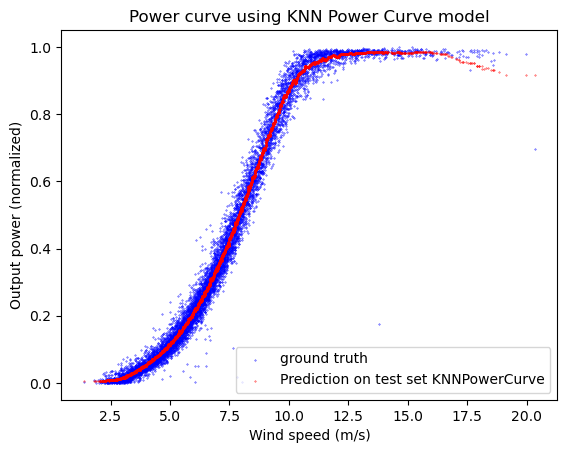

Mean Squared Error KNNPowerCurve: 0.001265112922089986
Mean Absolute Error KNNPowerCurve: 0.023127769952950097
RMSE KNNPowerCurve: 0.03556842591526909


In [25]:
from dswe import KNNPowerCurve

model = KNNPowerCurve()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

plt.scatter(x_test, y_test,color="blue", label="ground truth",s=0.1)
plt.scatter(x_test, prediction, color="red", label="Prediction on test set KNNPowerCurve",s=0.1)
plt.title("Power curve using KNN Power Curve model")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Output power (normalized)")
plt.legend()
plt.show()
#
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_KNNPowerCurve = mean_squared_error(y_test, prediction)
mae_KNNPowerCurve = mean_absolute_error(y_test, prediction)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

RMSE_KNNPowerCurve = rmse(y_test, prediction)

# print the results
print("Mean Squared Error KNNPowerCurve:", mse_KNNPowerCurve)
print("Mean Absolute Error KNNPowerCurve:", mae_KNNPowerCurve)
print("RMSE KNNPowerCurve:", RMSE_KNNPowerCurve)

--Initiating training on the entire dataset--


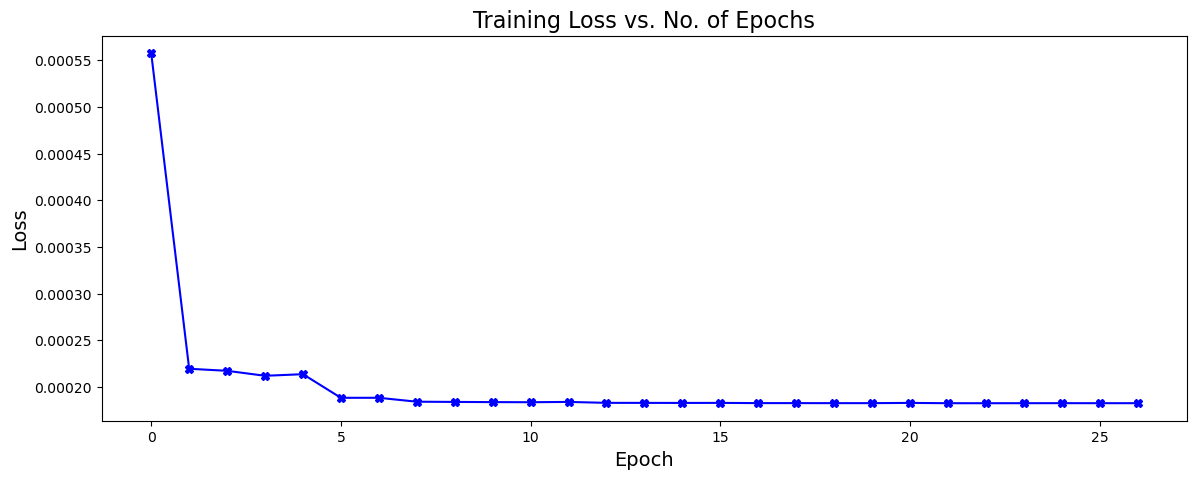

Everything done!!


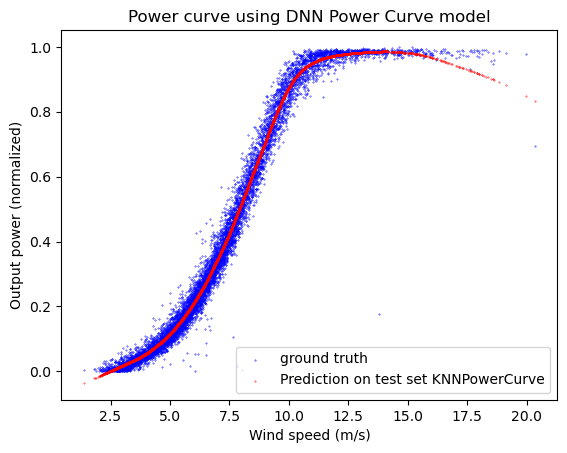

Mean Squared Error DNNPowerCurve: 0.0012672839989531614
Mean Absolute Error DNNPowerCurve: 0.02328274975979443
RMSE DNNPowerCurve: 0.454943581772739


In [26]:
from dswe import DNNPowerCurve

dnn = DNNPowerCurve(train_all=True, save_fig=True)
dnn.train(x_train, y_train)
prediction = dnn.predict(x_test)


plt.scatter(x_test, y_test,color="blue", label="ground truth",s=0.1)
plt.scatter(x_test, prediction, color="red", label="Prediction on test set KNNPowerCurve",s=0.1)
plt.title("Power curve using DNN Power Curve model")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Output power (normalized)")
plt.legend()
plt.show()
#
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

RMSE_DNNPowerCurve = rmse(y_test, prediction)
mse_DNNPowerCurve = mean_squared_error(y_test, prediction)
mae_DNNPowerCurve = mean_absolute_error(y_test, prediction)

# print the results
print("Mean Squared Error DNNPowerCurve:", mse_DNNPowerCurve)
print("Mean Absolute Error DNNPowerCurve:", mae_DNNPowerCurve)
print("RMSE DNNPowerCurve:", RMSE_DNNPowerCurve)


In [27]:
# Print the MSE and MAE from benchmark
#!!!  Since no power is provided on test set, the performance is compared to a test set from the training set !!!
#
print("SVMPowerCurve:")
print("Mean Squared Error SVMPowerCurve:", mse_SVMPowerCurve)
print("Mean Absolute Error SVMPowerCurve:", mae_SVMPowerCurve)
print("RMSE SVMPowerCurve:", rmse_SVMPowerCurve)
print("\n")
#
print("KNNPowerCurve:")
print("Mean Squared Error KNNPowerCurve:", mse_KNNPowerCurve)
print("Mean Absolute Error KNNPowerCurve:", mae_KNNPowerCurve)
print("RMSE KNNPowerCurve:", RMSE_KNNPowerCurve)
print("\n")
#
print("DNNPowerCurve:")
print("Mean Squared Error DNNPowerCurve:", mse_DNNPowerCurve)
print("Mean Absolute Error DNNPowerCurve:", mae_DNNPowerCurve)
print("RMSE DNNPowerCurve:", RMSE_DNNPowerCurve)

SVMPowerCurve:
Mean Squared Error SVMPowerCurve: 0.0012786889482564905
Mean Absolute Error SVMPowerCurve: 0.0241413802813954
RMSE SVMPowerCurve: 0.4527476361174858


KNNPowerCurve:
Mean Squared Error KNNPowerCurve: 0.001265112922089986
Mean Absolute Error KNNPowerCurve: 0.023127769952950097
RMSE KNNPowerCurve: 0.03556842591526909


DNNPowerCurve:
Mean Squared Error DNNPowerCurve: 0.0012672839989531614
Mean Absolute Error DNNPowerCurve: 0.02328274975979443
RMSE DNNPowerCurve: 0.454943581772739
